## Import Libraries and Load Data

In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [3]:
# load Data
(X_train, y_train),(X_test, y_test)=fashion_mnist.load_data()
print(X_train.shape)
print(X_test.shape)

4422102/4422102 [==============================] - 90s 20us/step
(60000, 28, 28)
(10000, 28, 28)


## Check Data and Preprocessing

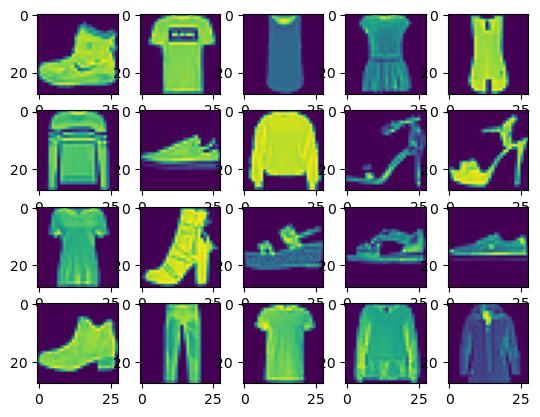

In [4]:
# show some train images
for i in range(20):
    #define subplot
    plt.subplot(4,5,1+i)
    #plot row pixel data
    plt.imshow(X_train[i])
#show the figure
plt.show()

In [5]:
#Normalize the pixel value (0-255) to (0-1)
X_train = X_train/255.0
X_test = X_test/255.0

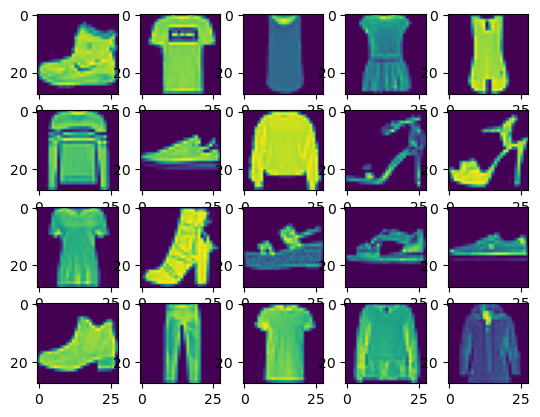

In [6]:
# verify that the data is in the correct format to train NN Model
for i in range(20):
    #define subplot
    plt.subplot(4,5,1+i)
    #plot raw pixel data
    plt.imshow(X_train[i])
#show the figure
plt.show()

## Build and Evalute Model

In [7]:
#Create ANN-Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [10]:
#compile the Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#Train the Model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5025 - sparse_categorical_accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3764 - sparse_categorical_accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3365 - sparse_categorical_accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3143 - sparse_categorical_accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2962 - sparse_categorical_accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2821 - sparse_categorical_accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2698 - sparse_categorical_accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2589 - sparse_categorical_accuracy: 0.9034
Epoch 9/10
1875/1875 [==========

In [12]:
#evalute the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3318 - sparse_categorical_accuracy: 0.8856


## Model Prediction and Accuracy

In [13]:
# Model Predictions
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [14]:
predictions[0]

array([1.0036635e-07, 3.4539589e-08, 7.7304414e-08, 1.0530057e-09,
       1.1229092e-08, 7.7954208e-04, 3.8198252e-07, 1.6314585e-03,
       1.0825536e-08, 9.9758840e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

In [16]:
y_test[0]

9

In [17]:
class_names=['T-shirt/top', 'Trouser', 'pullover', 'Dress', 'Coat'
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [18]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(
    class_names[predicted_label],100*np.max(predictions_array),
    class_names[true_label]), color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

IndexError: list index out of range

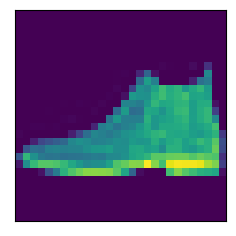

In [20]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_test)
plt.show()
